# 4.1

In [187]:
import numpy as np
import pandas as pd
import collections

In [56]:
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import pytagcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [32]:
file = open('C:/Users/K.N.W/Desktop/R2Python/positive-words.txt', mode='r', encoding='utf-8')

In [33]:
poswords = file.readlines()

In [36]:
sentence = []

for line in poswords:
    sentence.append(line)
file.close()

In [37]:
poswords = sentence

In [38]:
new = []

for pos in poswords:
    pos = re.sub("\n", "", pos)
    pos = re.sub(";", "", pos)
    new.append(pos)

In [40]:
pos_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        pos_words.append(new[i])

In [47]:
file = open('C:/Users/K.N.W/Desktop/R2Python/negative-words.txt', mode='r', encoding='utf-8')

In [48]:
negwords = file.readlines()

In [49]:
sentence = []

for line in negwords:
    sentence.append(line)
file.close()

In [50]:
negwords = sentence

In [51]:
new = []

for neg in negwords:
    neg = re.sub("\n", "", neg)
    neg = re.sub(";", "", neg)
    new.append(neg)

In [52]:
neg_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        neg_words.append(new[i])

In [130]:
text = [["I love this car"],
        ["This view is nice and amazing"],
        ["I am so excited about the concert"],
        ["I feel tired this morning"],
        ["I hate and hate and hate. So angry. Die!"]]

In [156]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[^a-zA-Z]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [160]:
result = sentiment(pos_words, neg_words, text)

In [172]:
result

{'i love this car': 1,
 'this view is nice and amazing': 2,
 'i am so excited about the concert': 1,
 'i feel tired this morning': -1,
 'i hate and hate and hate  so angry  die ': -5}

In [189]:
counter = collections.Counter(list(result.values()))

In [191]:
counter

Counter({1: 2, 2: 1, -1: 1, -5: 1})

In [180]:
np.mean(list(result.values()))

-0.4

## 막대그래프

In [194]:
from matplotlib import font_manager, rc #한글 깨짐 현상
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2PORM.ttf").get_name()
rc('font', family=font_name)

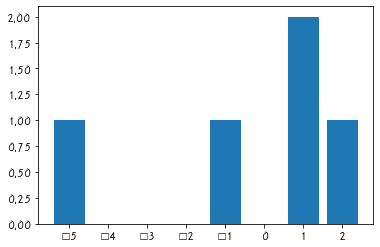

In [195]:
plt.bar(*zip(*counter.items()))
plt.show()

# 4.2

In [225]:
file = open('C:/Users/K.N.W/Desktop/R2Python/positive_word.txt', mode='r', encoding='utf-8')

In [226]:
poswords = file.readlines()

In [227]:
sentence = []

for line in poswords:
    sentence.append(line)
file.close()

In [228]:
poswords = sentence

In [229]:
new = []

for pos in poswords:
    pos = re.sub("\n", "", pos)
    pos = re.sub(";", "", pos)
    new.append(pos)

In [230]:
pos_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        pos_words.append(new[i])

In [231]:
file = open('C:/Users/K.N.W/Desktop/R2Python/negative_word.txt', mode='r', encoding='utf-8')

In [232]:
negwords = file.readlines()

In [233]:
new = []

for neg in negwords:
    neg = re.sub("\n", "", neg)
    neg = re.sub(";", "", neg)
    new.append(neg)

In [234]:
neg_words = []
for i in range(len(new)):
    if len(new[i]) > 1:
        neg_words.append(new[i])

In [235]:
file = open('C:/Users/K.N.W/Desktop/R2Python/trot.txt', mode='r', encoding='utf-8')

In [236]:
trot = file.readlines()

In [237]:
sentence = []

for line in trot:
    sentence.append(line)
file.close()

In [238]:
trot = sentence

In [239]:
new = []

for tr in trot:
    tr = re.sub("\n", "", tr)
    tr = re.sub(";", "", tr)
    tr = re.sub("\ufeff", "", tr)
    new.append(tr)

In [267]:
trot2 = []

for t in range(len(trot)):
    trot2.append([trot[t]])

In [268]:
def sentiment(pos_words, neg_words, text):
    for i in range(len(text)):
        text[i][0] = re.sub('[ㄱ-ㅎ]', ' ', text[i][0])
        text[i][0] = text[i][0].lower()
    
    nlp = Twitter()
    tagged = []

    for s in text:
        n = nlp.pos(s[0])
        tagged.append(n)
        
    total = []

    for t in range(len(tagged)):
        tag = []
        for i in range(len(tagged[t])):
            tag.append(tagged[t][i][0])
        total.append(tag)
        
    result = {}
    
    for t in range(len(total)):
        score = 0
        for i in range(len(total[t])):
            if total[t][i] in pos_words:
                score += 1
            if total[t][i] in neg_words:
                score -= 1
        result.update({text[t][0] : score})
        
    return result

In [269]:
result = sentiment(pos_words, neg_words, trot2)

In [270]:
result

{'\ufeff잘 가라 나를 잊어라 이까짓 거 사랑 몇 번은 더 할 테니 알잖아 내가 뒤끝이 좀 짧아서 알잖아 내가 너 말고도 님이 많아서 난 싫어 간질간질 거리는 이별 이 맘 때쯤 때쯤 흐르는 눈물 할 만큼 했잖아 미련이 없잖아 (짠짠 짜잔 짠) 잘 가라 나를 잊어라 이까짓 거 사랑 몇 번은 더 할 테니 잘 가라 돌아보지 말아라 여기서 난 안녕 멀리 안 나갈 테니 울지 마라 울지 마라 울지 마라 알잖아 내가 깔끔한 게 좋아서 혹시나 하는 맘에 하는 얘기인 거야 비라도 부슬부슬 오는 늦은 밤 술이 한 잔 두 잔 들어가는 밤 혀 꼬인 말투로 전화하지 마라 (짠짠 짜잔 짠) 잘 가라 나를 잊어라 이까짓 거 사랑 몇 번은 더 할 테니 잘 가라 돌아보지 말아라 여기서 난 안녕 멀리 안 나갈 테니 잘 가라 나를 잊어라 이까짓 거 이별 몇 번은 더 할 테니 잘 가라 돌아보지 말아라 여기서 난 안녕 멀리 안 나갈 테니 울지 마라 울지 마라 울지 마라(홍진영)\n': 4,
 '산다는 게 다 그런 거지 누구나 빈손으로 와 소설같은 한 편의 얘기들을 세상에 뿌리며 살지 자신에게 실망하지마 모든 걸 잘할 순 없어 오늘보다 더 나은 내일이면 돼 인생은 지금이야 아모르 파티 아모르 파티 인생이란 붓을 들고 서 무엇을 그려야할지 고민하고 방황하던 시간이 없다면 거짓말이지 말해 뭐해 쏜 화살처럼 사랑도 지나갔지만 그 추억들 눈이 부시면서도 슬프던 행복이여 나이는 숫자 마음이 진짜 가슴이 뛰는대로 가면 돼 이제는 더이상 슬픔이여 안녕 왔다 갈 한 번의 인생아 연애는 필수 결혼은 선택 가슴이 뛰는대로 하면 돼 눈물은 이별의 거품일 뿐이야 다가올 사랑은 두렵지 않아 아모르 파티 아모르 파티 말해 뭐해 쏜 화살처럼 사랑도 지나갔지만 그 추억들 눈이 부시면서도 슬프던 행복이여 나이는 숫자 마음이 진짜 가슴이 뛰는대로 가면 돼 이제는 더이상 슬픔이여 안녕 왔다 갈 한 번의 인생아 연애는 필수 결혼은 선택 가슴이 뛰는대로 하면 돼 눈물은 이별의 거품일 뿐이야 다가올 사랑은 두렵지 않아 아모르 파티 

In [271]:
counter = collections.Counter(list(result.values()))

In [275]:
sorted(counter)

[-7, -6, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 16, 17, 20]

In [273]:
np.mean(list(result.values()))

4.533333333333333

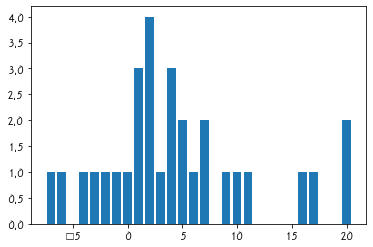

In [276]:
plt.bar(*zip(*counter.items()))
plt.show()